# Model Testing
## Setup

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

## Reading in Alphas & Mapping To DF

In [2]:
alpha_df = pd.read_pickle(r"K:\Code\Tennis_Betting\2. Model exploration\alphas\mens_alphas.pickle")
alpha_df.dropna(inplace=True)
alpha_df.head()

,,p_dict,x
start,end,,
2017-01-02,2017-04-01,"{'Choinski J.': 0, 'Broady L.': 1, 'Delbonis F...","[0.7239695125774777, 1.069924249476819, 1.0938..."
2002-05-27,2002-05-27,"{'Pretzsch A.': 0, 'Larsson M.': 1, 'Pavel A.'...","[0.800685292740611, 0.964876756885678, 1.52120..."
2012-05-22,2012-05-26,"{'Del Bonis F.': 0, 'Blake J.': 1, 'Delbonis F...","[1.6033600263722116, 0.9296558179990959, 1.334..."
2000-07-10,2000-07-10,"{'Pretzsch A.': 0, 'Larsson M.': 1, 'Pavel A.'...","[1.0469830051536664, 1.7652306826038533, 1.447..."
2013-09-16,2013-09-22,"{'Del Bonis F.': 0, 'Broady L.': 1, 'Blake J.'...","[1.3234143857328917, 0.7012684908314621, 1.191..."


In [3]:
alpha_df

,,p_dict,x
start,end,,
2017-01-02,2017-04-01,"{'Choinski J.': 0, 'Broady L.': 1, 'Delbonis F...","[0.7239695125774777, 1.069924249476819, 1.0938..."
2002-05-27,2002-05-27,"{'Pretzsch A.': 0, 'Larsson M.': 1, 'Pavel A.'...","[0.800685292740611, 0.964876756885678, 1.52120..."
2012-05-22,2012-05-26,"{'Del Bonis F.': 0, 'Blake J.': 1, 'Delbonis F...","[1.6033600263722116, 0.9296558179990959, 1.334..."
2000-07-10,2000-07-10,"{'Pretzsch A.': 0, 'Larsson M.': 1, 'Pavel A.'...","[1.0469830051536664, 1.7652306826038533, 1.447..."
2013-09-16,2013-09-22,"{'Del Bonis F.': 0, 'Broady L.': 1, 'Blake J.'...","[1.3234143857328917, 0.7012684908314621, 1.191..."
...,...,...,...
2012-02-13,2012-02-19,"{'Del Bonis F.': 0, 'Blake J.': 1, 'Pospisil J...","[1.2588770018146183, 1.0964543389583847, 0.783..."
2005-04-04,2005-04-10,"{'Pavel A.': 0, 'Healey N.': 1, 'Blake J.': 2,...","[1.337580038466781, 1.1393564862444177, 1.0461..."
2011-04-18,2011-04-24,"{'Del Bonis F.': 0, 'Pavel A.': 1, 'Blake J.':...","[0.7196013424409046, 0.7213967229564195, 0.974..."


In [4]:
mens_df = pd.read_csv('../data/mens.csv',header=0,parse_dates=["Date"])
mens_df = mens_df[mens_df['Comment']!='Walkover']

cols_to_drop = ['Location','Tournament','Series','Court', 'Surface','Round', 'Best of', 'WRank', 'LRank', 'W1', 'L1','W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets','Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL','B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts','LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL','AvgW', 'AvgL']
mens_df.drop(columns=cols_to_drop,inplace=True)

K:\Programs\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,12,15,16,17,18,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dates_list = []
for i,df in mens_df.groupby([mens_df.Date.dt.year,'ATP']):
    dates_list.append((min(df['Date']),max(df['Date'])))
dates_list=list(set(dates_list))

In [6]:
len(dates_list)

834

In [7]:
for i,x in alpha_df.iterrows():
    start=i[0];end=i[1];p_dict=x.p_dict; alpha = x.x; alpha[-1]=0.5
    df_slice = mens_df.loc[(mens_df['Date']<=end) & (mens_df['Date']>=start),:]
    mens_df.loc[(mens_df['Date']<=end) & (mens_df['Date']>=start),'w_alpha'] = alpha[df_slice['Winner'].map(p_dict).fillna(-1).astype('int')]
    mens_df.loc[(mens_df['Date']<=end) & (mens_df['Date']>=start),'l_alpha'] = alpha[df_slice['Loser'].map(p_dict).fillna(-1).astype('int')]

In [14]:
## % of data we don't have
mens_df[mens_df['w_alpha'].isna() | mens_df['l_alpha'].isna()].shape[0]/mens_df.shape[0]

0.12826344379076368

In [18]:
mens_df = mens_df.loc[~mens_df['w_alpha'].isna() & ~mens_df['l_alpha'].isna(),:]

## Testing Model Accuracy

In [19]:
mens_df['Correct'] = mens_df['w_alpha'] > mens_df['l_alpha']
mens_df['Correct'].mean()

0.6447961361823239

In [20]:
mens_df['p'] = mens_df[['w_alpha','l_alpha']].max(axis=1)/(mens_df['w_alpha']+mens_df['l_alpha'])

In [21]:
x = np.linspace(0.5,0.95,100)
y = []
for p_threshold in x:
    accuracy = round(mens_df[mens_df['p']>p_threshold]['Correct'].mean(),2)
    y.append(accuracy)
    #print("Betting on games which we are over ",p_threshold,"confident in gives",accuracy,"% accuracy")

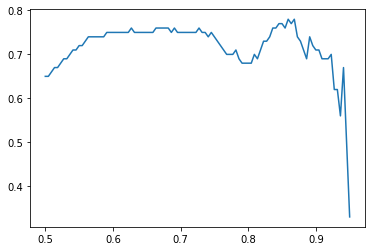

In [22]:
plt.plot(x,y)